In [28]:
import re
import nltk
import pandas as pd

In [29]:
dataframe= pd.read_csv('train.csv/train.csv')

In [30]:
dataframe.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [31]:
#Label is Dependent Feature
#Others are independent features

In [32]:
#Getting Independent Features
X= dataframe.drop('label', axis= 1)

In [33]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [34]:
#Getting Dependent Features
y= dataframe['label']

In [35]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [36]:
dataframe.shape

(20800, 5)

In [37]:
#From above we know, we have 5 features and 20800 rows

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [39]:
messages= dataframe.copy()

In [40]:
#Dropping NaN values

dataframe= dataframe.dropna()


In [41]:
dataframe.shape
#See some of the indexes getting dropped after dropping NaN values

(18285, 5)

In [42]:
messages.reset_index(inplace= True)
#Some of the records will go missing so we need to reset the index

In [43]:
messages['title'][6]

'Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights'

In [44]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [45]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus= []
for i in range(0, len(messages)):
    if isinstance(messages['title'][i], str):
        review= re.sub('[^a-zA-Z]', ' ', messages['title'][i])
        review= review.lower()
        review= review.split()
        review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review= ' '.join(review)
        corpus.append(review)
    else:
        corpus.append(' ')

In [46]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

**Applying the Bag of Words**


**Apply Count Vectorizer**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features= 5000, ngram_range= (1,3))
X= cv.fit_transform(corpus).toarray()

In [48]:
X.shape

(20800, 5000)

In [49]:
y= messages['label']

**Splitting Datasets into Train and Test Split**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.33, random_state= 0)

In [51]:
#Extracting the features
#See ngram_range= (1,3), it included words of length of 1,2,3 
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'absurd', 'abus', 'abus new',
       'abus new york', 'academi', 'accept', 'access', 'access pipelin',
       'access pipelin protest', 'accid'], dtype=object)

In [52]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [55]:
count_df= pd.DataFrame(X_train, columns= cv.get_feature_names_out())

In [56]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
import matplotlib.pyplot as plt


In [59]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion matrix', cmap= plt.cm.Blues):
    plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float')/ cm.sum(axis= 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    thresh= cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= "center", color= "white" if cm[i,j]> thresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

**MultinomialNB Algorithm**


In [60]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()


In [61]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.875
Confusion matrix, without normalization


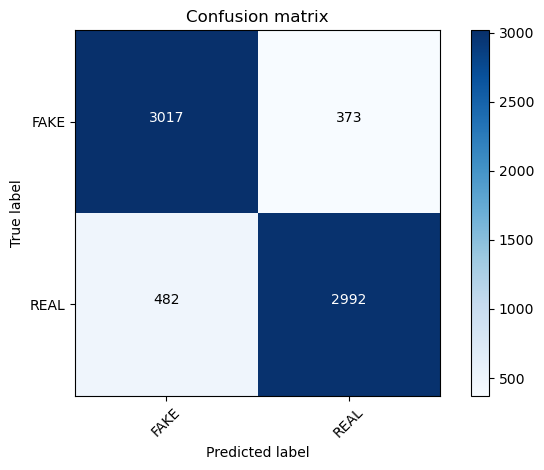

In [62]:
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" %score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes= ['FAKE', 'REAL'])

**Passive Aggresive Classifier Algorithm**


In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf= PassiveAggressiveClassifier(max_iter= 50)

Accuracy: 0.924 
Confusion matrix, without normalization


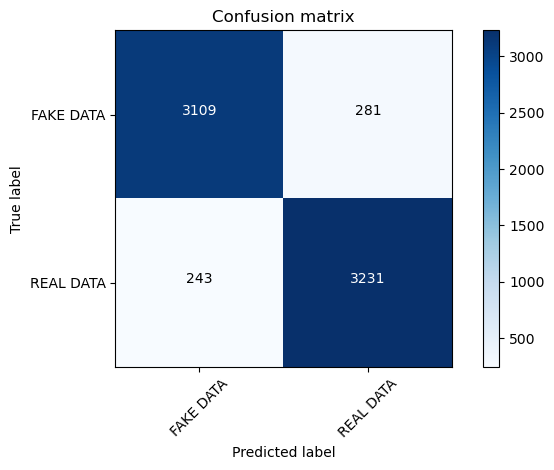

In [65]:
linear_clf.fit(X_train, y_train)
pred= linear_clf.predict(X_test)
score= metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f " % score)
cm= metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,classes= ['FAKE DATA', 'REAL DATA'])

**MULTINOMIAL CLASSIFIER WITH HYPERPARAMETER**

In [66]:
classifier= MultinomialNB(alpha= 0.1)

In [68]:
previous_score= 0
for alpha in np.arange(0,1,0.1):
    sub_classifier= MultinomialNB(alpha= alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred= sub_classifier.predict(X_test)
    score= metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier= sub_classifier
    print("Alpha: {}, Score: {}". format(alpha,score))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8613053613053613
Alpha: 0.1, Score: 0.8742715617715617
Alpha: 0.2, Score: 0.875
Alpha: 0.30000000000000004, Score: 0.8752913752913752
Alpha: 0.4, Score: 0.8758741258741258
Alpha: 0.5, Score: 0.8755827505827506
Alpha: 0.6000000000000001, Score: 0.8751456876456877
Alpha: 0.7000000000000001, Score: 0.8748543123543123
Alpha: 0.8, Score: 0.8751456876456877
Alpha: 0.9, Score: 0.8752913752913752


In [69]:
feature_names= cv.get_feature_names_out()

In [75]:
classifier.feature_log_prob_

array([[ -8.9631485 ,  -9.16586001,  -9.99093473, ...,  -9.99093473,
        -11.4572718 ,  -9.76267608],
       [ -8.70157255,  -9.11267148,  -9.82291309, ...,  -9.82291309,
         -8.82076107,  -9.29838863]])

In [77]:
##Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-11.457271800779393, 'access pipelin protest'),
 (-11.457271800779393, 'acknowledg emf'),
 (-11.457271800779393, 'acknowledg emf damag'),
 (-11.457271800779393, 'acquit'),
 (-11.457271800779393, 'adhd'),
 (-11.457271800779393, 'airstrik kill'),
 (-11.457271800779393, 'al nusra'),
 (-11.457271800779393, 'alaska'),
 (-11.457271800779393, 'ambush'),
 (-11.457271800779393, 'america finest'),
 (-11.457271800779393, 'america finest news'),
 (-11.457271800779393, 'american concern'),
 (-11.457271800779393, 'american concern elect'),
 (-11.457271800779393, 'american lookout'),
 (-11.457271800779393, 'american peopl defeat'),
 (-11.457271800779393, 'american polit'),
 (-11.457271800779393, 'arsen'),
 (-11.457271800779393, 'au'),
 (-11.457271800779393, 'audio hillari'),
 (-11.457271800779393, 'audio hillari clinton')]

In [78]:
##Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse= True)[:20]

[(-2.9303703320049923, 'new'),
 (-2.980229532805687, 'time'),
 (-2.984402097333245, 'york'),
 (-2.984402097333245, 'new york'),
 (-3.0019776540226264, 'york time'),
 (-3.0019776540226264, 'new york time'),
 (-3.972341517489731, 'breitbart'),
 (-4.020261762562898, 'trump'),
 (-5.2883586616193305, 'donald'),
 (-5.297706708192399, 'donald trump'),
 (-5.772558888843543, 'say'),
 (-6.054094043615212, 'obama'),
 (-6.084568722872961, 'clinton'),
 (-6.176326683955827, 'presid'),
 (-6.210832695000021, 'attack'),
 (-6.21670125644368, 'state'),
 (-6.240526087925168, 'brief'),
 (-6.296302625382579, 'report'),
 (-6.32212717218655, 'hous'),
 (-6.341942880013015, 'hillari')]